Question 1: What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples?

Answer:

 Anomaly Detection

Anomaly detection is the process of identifying data points, events, or patterns that deviate significantly from the normal behavior in a dataset. These unusual patterns are called anomalies or outliers.

It is widely used in fraud detection, network security, fault detection, and medical diagnosis.

Types of Anomalies

Point Anomalies

- A single data point is very different from the rest.

- Example: A credit card transaction of ₹1,00,000 when the user usually spends under ₹5,000.

Contextual Anomalies

- A data point is anomalous in a specific context (depends on time, location, or situation).

- Example: A temperature of 30°C is normal in summer but anomalous in winter.

Collective Anomalies

- A group of related data points collectively deviate from the normal pattern, even if individual points look normal.

- Example: Multiple login attempts from different locations within a short time (possible cyber-attack).

Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases?

Answer:
 1. Isolation Forest (IF)

Approach: Randomly partitions data using decision trees; anomalies are easier to isolate (shorter paths).

Best for: High-dimensional data, large datasets, and when anomalies are few and scattered.

Example use case: Fraud detection in financial transactions.

2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Approach: Groups points into dense clusters; points in low-density areas are treated as anomalies.

Best for: Spatial data, datasets with clusters of varying shapes, and noise detection.

Example use case: Detecting unusual GPS locations or network traffic anomalies.

3. Local Outlier Factor (LOF)

Approach: Compares local density of a point with its neighbors; lower density = anomaly.

Best for: Datasets with varying densities and when relative neighborhood structure matters.

Example use case: Identifying rare diseases from patient health records.


Question 3: What are the key components of a Time Series? Explain each with one
example.?

Answer:
Trend

Long-term increase or decrease in the data.

Example: Sales of smartphones increasing year after year.

Seasonality

Regular, repeating patterns over a fixed period (daily, monthly, yearly).

Example: Ice cream sales peaking every summer.

Cyclic Component

Fluctuations that occur over longer, irregular periods (not fixed like seasonality).

Example: Business cycles of boom and recession.

Irregular/Random Component

Unpredictable, random variations due to unexpected events.

Example: Sudden drop in travel bookings due to a natural disaster.

Question 4: Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?

Answer:

Stationarity in Time Series

A time series is stationary if its statistical properties (mean, variance, autocorrelation) remain constant over time.

In other words: no trend, no changing variance, no seasonality.

How to Test Stationarity

Visual inspection – plot data to check trend/seasonality.

Summary statistics – compare mean/variance in different time periods.

Statistical tests – e.g., ADF (Augmented Dickey-Fuller) or KPSS test.



Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.

Answer:
1. AR (AutoRegressive) Model

- Structure: Current value depends on its past values.
 - Yt​=c+ϕ1​Yt−1​+ϕ2​Yt−2​+⋯+ϵt​
-  Application: Data with correlation in past observations (no trend/seasonality).

Example: Stock prices depending on their past values.

2. MA (Moving Average) Model

- Structure: Current value depends on past error terms.
- Yt​=c+θ1​ϵt−1​+θ2​ϵt−2​+⋯+ϵt​
- Application: Data with short-term shock effects.

- Example: Modeling sudden demand spikes due to promotions.

3. ARIMA (AutoRegressive Integrated Moving Average)

Structure: Combines AR + MA + differencing (I = Integrated) to handle non-stationary data.

Application: General-purpose model for non-stationary time series.

Example: Forecasting sales or GDP growth.

4. SARIMA (Seasonal ARIMA)

Structure: ARIMA + seasonal components (seasonal AR, seasonal MA, seasonal differencing).

Application: Time series with trend + seasonality.

Example: Monthly airline passenger demand.

5. SARIMAX (Seasonal ARIMA with Exogenous Variables)

Structure: SARIMA + external/exogenous variables (X).

Application: Forecasting with influence of outside factors.

Example: Sales forecasting using SARIMAX with promotions/holidays as external variables.

Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components?



Dataset Overview:
            Passengers
date                  
1949-01-01         112
1949-01-01         118
1949-03-01         132
1949-03-01         129
1949-04-01         121

Dataset Shape: (144, 1)
Date Range: 1949-01-01 00:00:00 to 1960-12-01 00:00:00


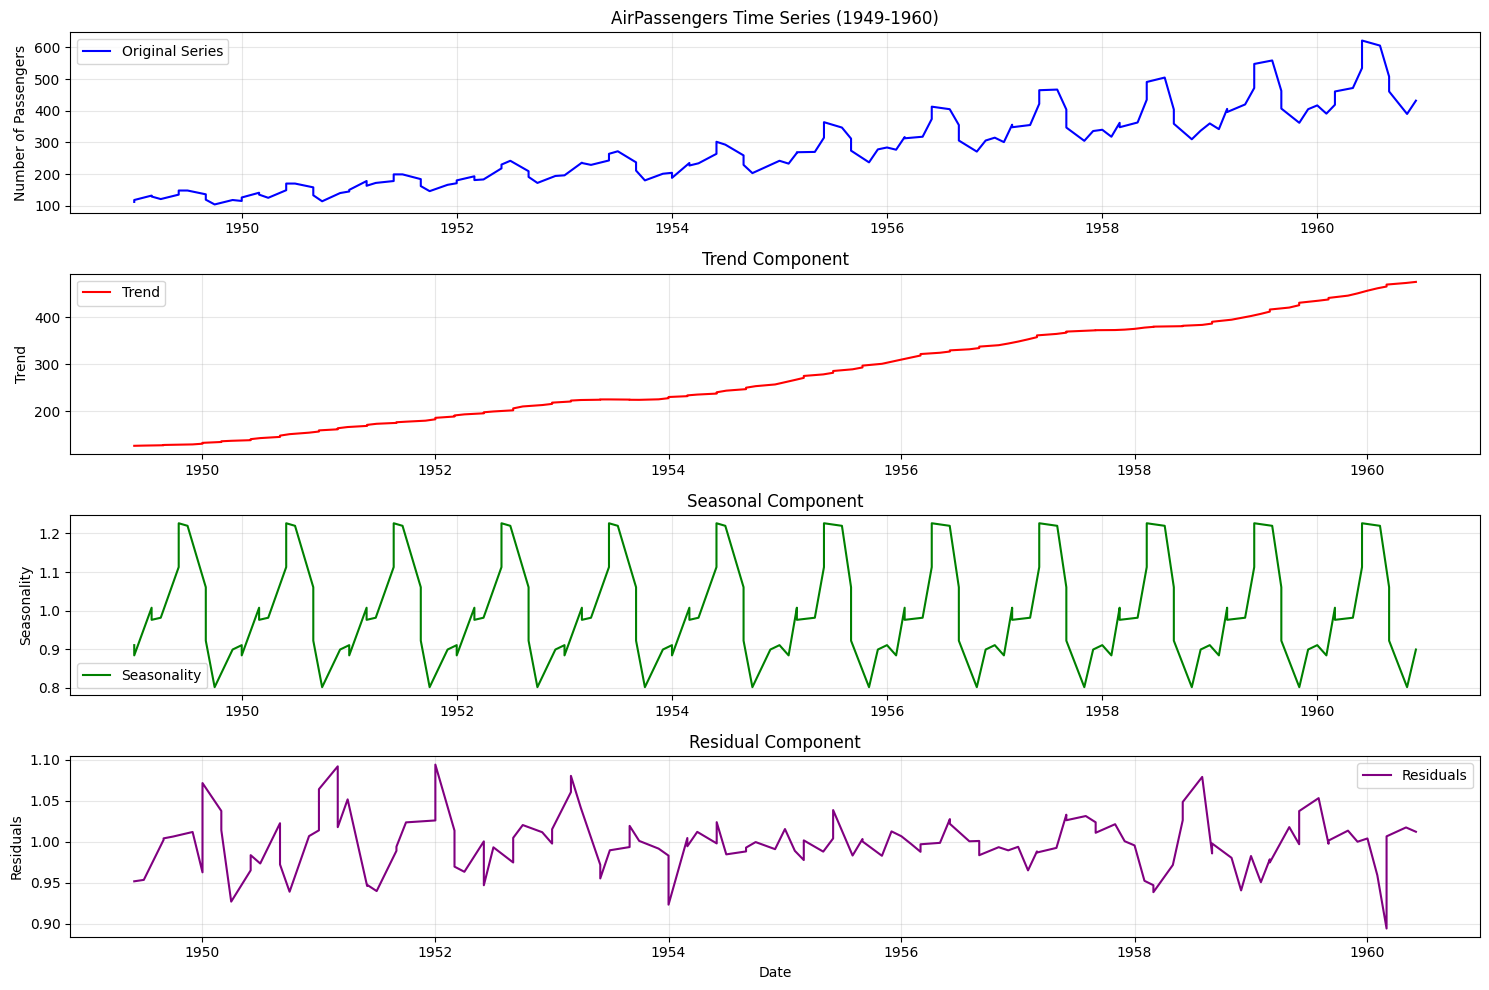


=== DECOMPOSITION SUMMARY ===
Trend range: 126.8 - 475.0
Seasonality range: 0.801 - 1.227
Residuals range: 0.894 - 1.094
Residuals mean: 0.998

Reconstruction Mean Absolute Error: 9.3462


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

# Load the AirPassengers dataset
# This dataset is built into statsmodels
from statsmodels.datasets import get_rdataset

# Load the AirPassengers dataset
data = get_rdataset('AirPassengers')
df = data.data

# Convert the 'time' column (float representing year and fractional year) to datetime
# Extract year and fractional part, calculate month
df['year'] = df['time'].apply(np.floor).astype(int)
df['fractional_year'] = df['time'] - df['year']
# Approximate month by multiplying fractional year by 12 and rounding up
df['month'] = (df['fractional_year'] * 12).apply(np.ceil).astype(int)
# Ensure month is within 1-12 range
df['month'] = np.clip(df['month'], 1, 12)

# Create datetime column from year and month
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))

# Set date as index and keep only the 'value' column
df.set_index('date', inplace=True)
df = df[['value']]
df.columns = ['Passengers']

print("Dataset Overview:")
print(df.head())
print(f"\nDataset Shape: {df.shape}")
print(f"Date Range: {df.index.min()} to {df.index.max()}")

# Plot the original time series
plt.figure(figsize=(15, 10))

# Original series
plt.subplot(4, 1, 1)
plt.plot(df.index, df['Passengers'], label='Original Series', color='blue')
plt.title('AirPassengers Time Series (1949-1960)')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True, alpha=0.3)

# Decompose the time series
# Using multiplicative decomposition since the seasonal pattern appears to grow with the trend
decomposition = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)

# Plot trend component
plt.subplot(4, 1, 2)
plt.plot(df.index, decomposition.trend, label='Trend', color='red')
plt.title('Trend Component')
plt.ylabel('Trend')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot seasonal component
plt.subplot(4, 1, 3)
plt.plot(df.index, decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonal Component')
plt.ylabel('Seasonality')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot residual component
plt.subplot(4, 1, 4)
plt.plot(df.index, decomposition.resid, label='Residuals', color='purple')
plt.title('Residual Component')
plt.ylabel('Residuals')
plt.xlabel('Date')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display summary statistics
print("\n=== DECOMPOSITION SUMMARY ===")
print(f"Trend range: {decomposition.trend.min():.1f} - {decomposition.trend.max():.1f}")
print(f"Seasonality range: {decomposition.seasonal.min():.3f} - {decomposition.seasonal.max():.3f}")
print(f"Residuals range: {decomposition.resid.min():.3f} - {decomposition.resid.max():.3f}")
print(f"Residuals mean: {decomposition.resid.mean():.3f}")

# Additional analysis: Check if the decomposition is valid
# The product of trend * seasonality * residuals should approximately equal the original series
reconstructed = decomposition.trend * decomposition.seasonal * decomposition.resid
reconstruction_error = np.mean(np.abs(df['Passengers'] - reconstructed.dropna()))

print(f"\nReconstruction Mean Absolute Error: {reconstruction_error:.4f}")

Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.


Dataset Overview:
   ride_distance  ride_duration  fare_amount
0       1.407804      14.966548     9.283832
1       9.030364      83.626921    66.640055
2       3.950237      41.403360    28.563112
3       2.738828      30.441205    26.847840
4       0.508875       7.887698     7.963355

Dataset Shape: (1000, 3)
Basic Statistics:
       ride_distance  ride_duration  fare_amount
count    1000.000000    1000.000000  1000.000000
mean        3.308949      31.788364    30.209473
std         3.465379      31.004017    47.629198
min         0.013928     -10.215254    -5.845189
25%         0.848247       9.097534     8.355005
50%         2.202631      22.475065    18.516797
75%         4.625849      44.649216    34.916569
max        24.517337     249.262199   495.802133

Anomaly Detection Results:
Number of anomalies detected: 50
Percentage of anomalies: 5.00%


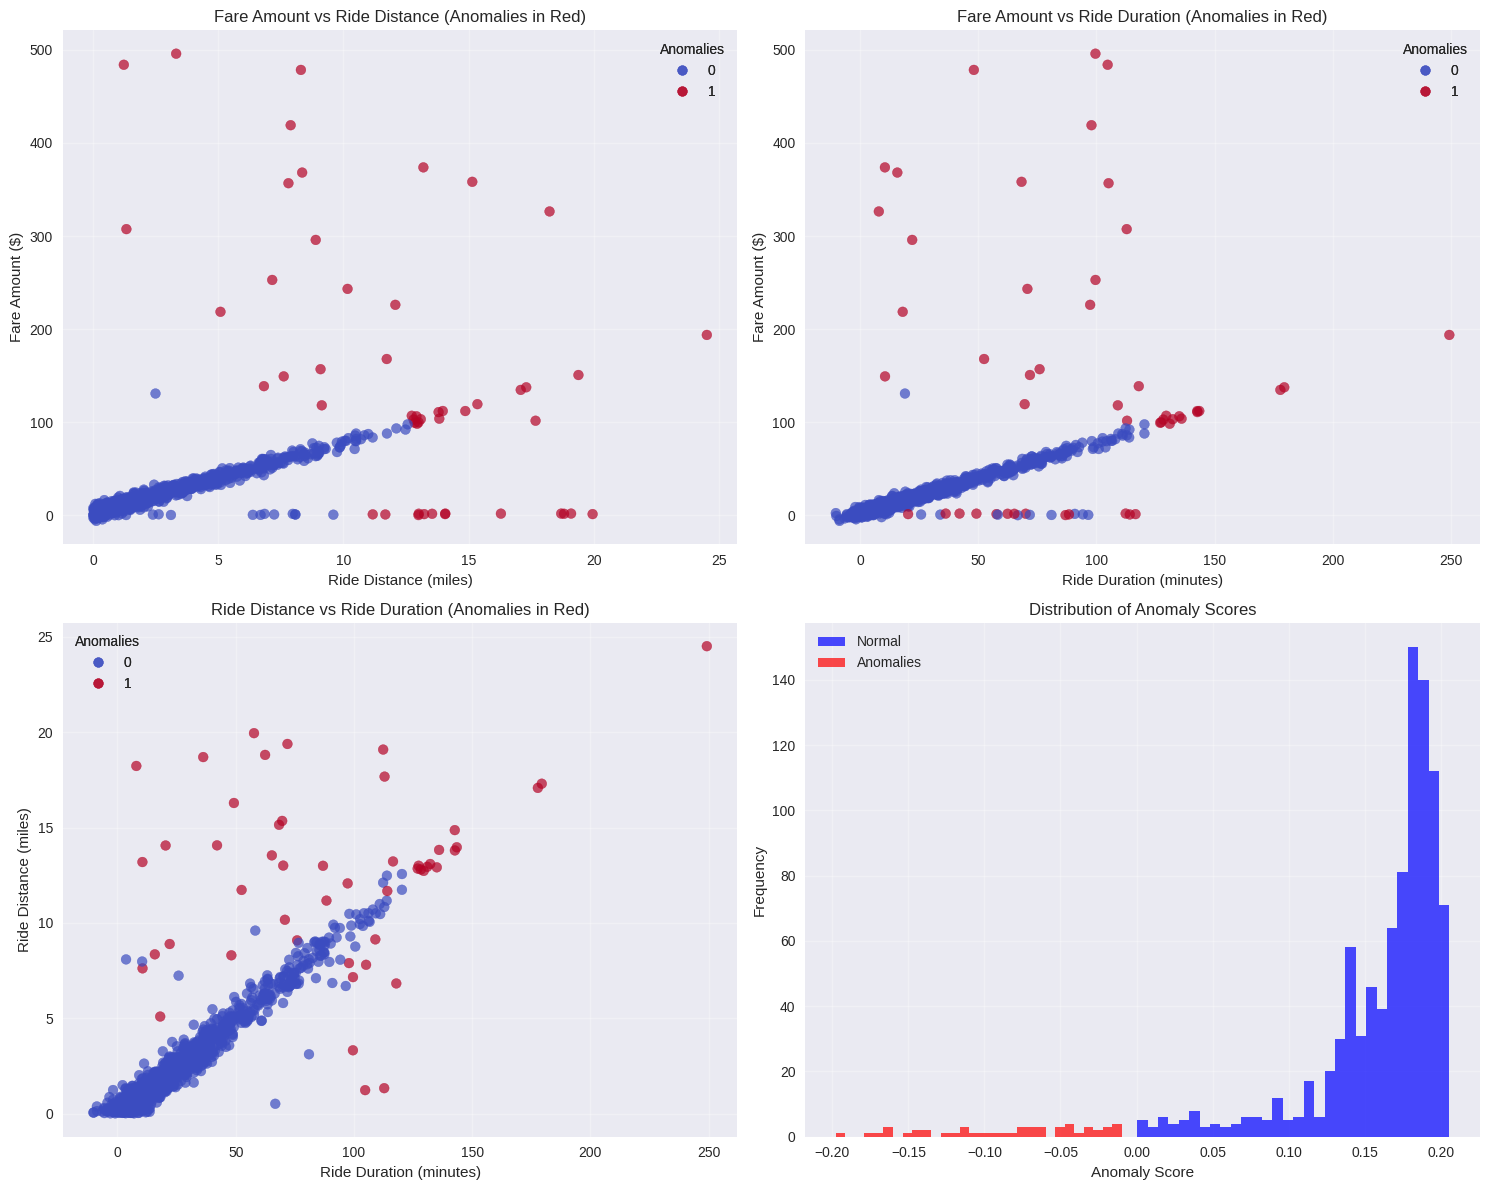


=== ANOMALY ANALYSIS ===
Top 10 most anomalous records:
     ride_distance  ride_duration  fare_amount  anomaly_score_value
171      11.173646      88.389516     1.139165            -0.009661
499      12.851597     126.970385    99.501958            -0.013681
133       9.138255     109.054207   118.234063            -0.015736
69       13.002439     127.369405    99.972383            -0.015746
446      12.806322     128.282276   102.915751            -0.017018
481       9.089616      75.981082   157.022622            -0.021032
441      12.946376     131.012860    98.429744            -0.021905
154      12.732111     129.521182   107.023898            -0.025668
22       13.010431      70.096782     1.823380            -0.026842
518      13.092826     132.265226   103.316029            -0.030176

Summary of anomalies:
Average fare of anomalies: $88.94
Average distance of anomalies: 11.98 miles
Average duration of anomalies: 111.89 minutes

Comparison with normal data:
Normal avg fare: $2

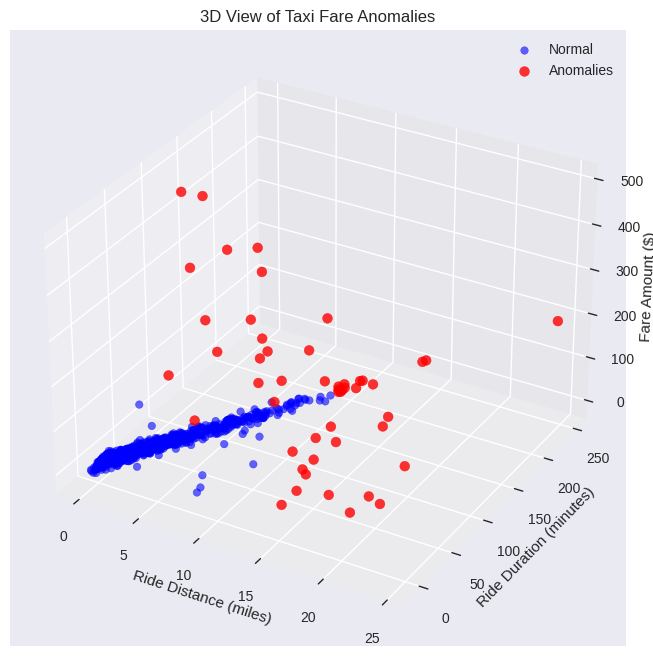

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

# Load NYC Taxi Fare dataset (using a sample for demonstration)
# In practice, you would load your actual dataset
# Let's create a synthetic dataset that mimics NYC Taxi Fare characteristics
np.random.seed(42)

# Generate synthetic data similar to NYC Taxi Fare
n_samples = 1000
ride_distance = np.random.exponential(3, n_samples)  # miles
ride_duration = ride_distance * 10 + np.random.normal(0, 5, n_samples)  # minutes
fare_amount = 2.5 + ride_distance * 2.5 + ride_duration * 0.5 + np.random.normal(0, 3, n_samples)

# Create some anomalies
n_anomalies = 50
anomaly_indices = np.random.choice(n_samples, n_anomalies, replace=False)

# Add anomalous patterns
ride_distance[anomaly_indices] = np.random.uniform(0.1, 20, n_anomalies)  # very short or very long rides
ride_duration[anomaly_indices] = np.random.uniform(1, 120, n_anomalies)  # very short or very long durations
fare_amount[anomaly_indices] = np.where(
    np.random.rand(n_anomalies) > 0.5,
    np.random.uniform(100, 500, n_anomalies),  # extremely high fares
    np.random.uniform(0.1, 2, n_anomalies)     # extremely low fares
)

# Create DataFrame
df = pd.DataFrame({
    'ride_distance': ride_distance,
    'ride_duration': ride_duration,
    'fare_amount': fare_amount
})

print("Dataset Overview:")
print(df.head())
print(f"\nDataset Shape: {df.shape}")
print(f"Basic Statistics:\n{df.describe()}")

# Prepare features for Isolation Forest
features = ['ride_distance', 'ride_duration', 'fare_amount']
X = df[features].copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Isolation Forest
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.05,  # expected proportion of anomalies
    random_state=42,
    n_jobs=-1
)

# Fit and predict
df['anomaly_score'] = iso_forest.fit_predict(X_scaled)
df['anomaly'] = df['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)

# Calculate anomaly scores (the lower, the more anomalous)
df['anomaly_score_value'] = iso_forest.decision_function(X_scaled)

print(f"\nAnomaly Detection Results:")
print(f"Number of anomalies detected: {df['anomaly'].sum()}")
print(f"Percentage of anomalies: {(df['anomaly'].sum() / len(df)) * 100:.2f}%")

# Visualize the anomalies on 2D scatter plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Fare Amount vs Ride Distance
scatter1 = axes[0, 0].scatter(
    df['ride_distance'],
    df['fare_amount'],
    c=df['anomaly'],
    cmap='coolwarm',
    alpha=0.7,
    s=50
)
axes[0, 0].set_xlabel('Ride Distance (miles)')
axes[0, 0].set_ylabel('Fare Amount ($)')
axes[0, 0].set_title('Fare Amount vs Ride Distance (Anomalies in Red)')
axes[0, 0].grid(True, alpha=0.3)
legend1 = axes[0, 0].legend(*scatter1.legend_elements(), title="Anomalies")
axes[0, 0].add_artist(legend1)

# Plot 2: Fare Amount vs Ride Duration
scatter2 = axes[0, 1].scatter(
    df['ride_duration'],
    df['fare_amount'],
    c=df['anomaly'],
    cmap='coolwarm',
    alpha=0.7,
    s=50
)
axes[0, 1].set_xlabel('Ride Duration (minutes)')
axes[0, 1].set_ylabel('Fare Amount ($)')
axes[0, 1].set_title('Fare Amount vs Ride Duration (Anomalies in Red)')
axes[0, 1].grid(True, alpha=0.3)
legend2 = axes[0, 1].legend(*scatter2.legend_elements(), title="Anomalies")
axes[0, 1].add_artist(legend2)

# Plot 3: Ride Distance vs Ride Duration
scatter3 = axes[1, 0].scatter(
    df['ride_duration'],
    df['ride_distance'],
    c=df['anomaly'],
    cmap='coolwarm',
    alpha=0.7,
    s=50
)
axes[1, 0].set_xlabel('Ride Duration (minutes)')
axes[1, 0].set_ylabel('Ride Distance (miles)')
axes[1, 0].set_title('Ride Distance vs Ride Duration (Anomalies in Red)')
axes[1, 0].grid(True, alpha=0.3)
legend3 = axes[1, 0].legend(*scatter3.legend_elements(), title="Anomalies")
axes[1, 0].add_artist(legend3)

# Plot 4: Distribution of Anomaly Scores
normal_scores = df[df['anomaly'] == 0]['anomaly_score_value']
anomaly_scores = df[df['anomaly'] == 1]['anomaly_score_value']

axes[1, 1].hist(normal_scores, bins=30, alpha=0.7, label='Normal', color='blue')
axes[1, 1].hist(anomaly_scores, bins=30, alpha=0.7, label='Anomalies', color='red')
axes[1, 1].set_xlabel('Anomaly Score')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Anomaly Scores')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display detailed information about anomalies
print("\n=== ANOMALY ANALYSIS ===")
print("Top 10 most anomalous records:")
anomalies_df = df[df['anomaly'] == 1].nlargest(10, 'anomaly_score_value')
print(anomalies_df[features + ['anomaly_score_value']])

print(f"\nSummary of anomalies:")
print(f"Average fare of anomalies: ${anomalies_df['fare_amount'].mean():.2f}")
print(f"Average distance of anomalies: {anomalies_df['ride_distance'].mean():.2f} miles")
print(f"Average duration of anomalies: {anomalies_df['ride_duration'].mean():.2f} minutes")

# Compare with normal data
normal_data = df[df['anomaly'] == 0]
print(f"\nComparison with normal data:")
print(f"Normal avg fare: ${normal_data['fare_amount'].mean():.2f}")
print(f"Normal avg distance: {normal_data['ride_distance'].mean():.2f} miles")
print(f"Normal avg duration: {normal_data['ride_duration'].mean():.2f} minutes")

# Additional 3D visualization (optional)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot normal points
normal = df[df['anomaly'] == 0]
ax.scatter(normal['ride_distance'], normal['ride_duration'], normal['fare_amount'],
           c='blue', alpha=0.6, s=30, label='Normal')

# Plot anomalies
anomalies = df[df['anomaly'] == 1]
ax.scatter(anomalies['ride_distance'], anomalies['ride_duration'], anomalies['fare_amount'],
           c='red', alpha=0.8, s=50, label='Anomalies')

ax.set_xlabel('Ride Distance (miles)')
ax.set_ylabel('Ride Duration (minutes)')
ax.set_zlabel('Fare Amount ($)')
ax.set_title('3D View of Taxi Fare Anomalies')
ax.legend()
plt.show()

Question 8: Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.


Dataset Overview:
            Passengers
date                  
1949-01-01         112
1949-01-01         118
1949-03-01         132
1949-03-01         129
1949-04-01         121

Dataset Shape: (144, 1)
Date Range: 1949-01-01 00:00:00 to 1960-12-01 00:00:00


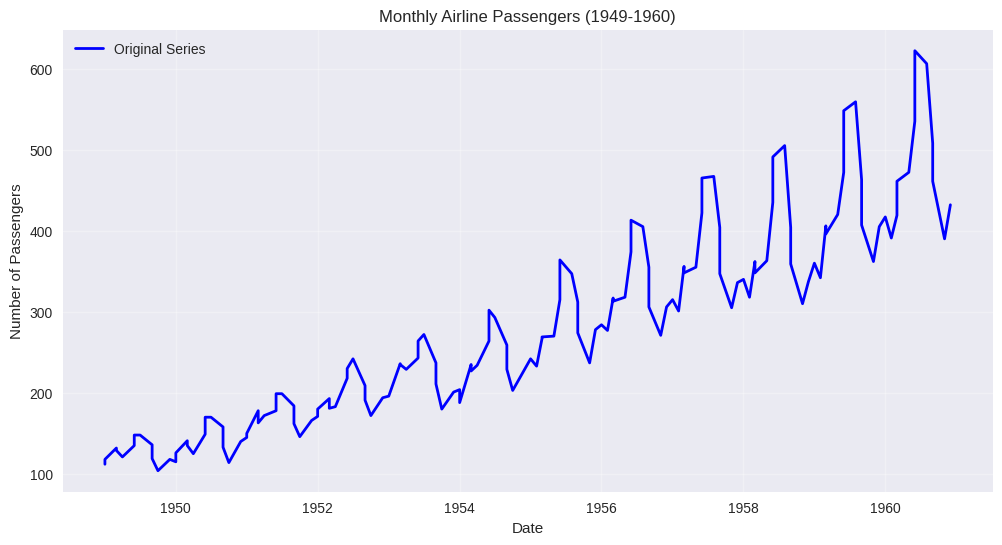

<Figure size 1200x800 with 0 Axes>

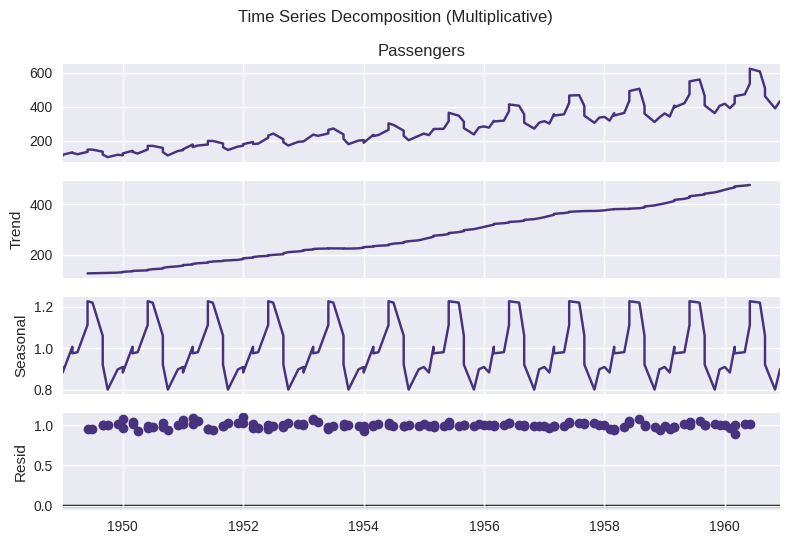

Original Series Stationarity Check:
ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598
→ Series is non-stationary

After First Differencing:
ADF Statistic: -2.6577793064862067
p-value: 0.0816335412763905
Critical Values:
   1%: -3.4865346059036564
   5%: -2.8861509858476264
   10%: -2.579896092790057
→ Series is non-stationary

After Seasonal Differencing (lag=12):
ADF Statistic: -3.383020726492481
p-value: 0.011551493085514952
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598
→ Series is stationary


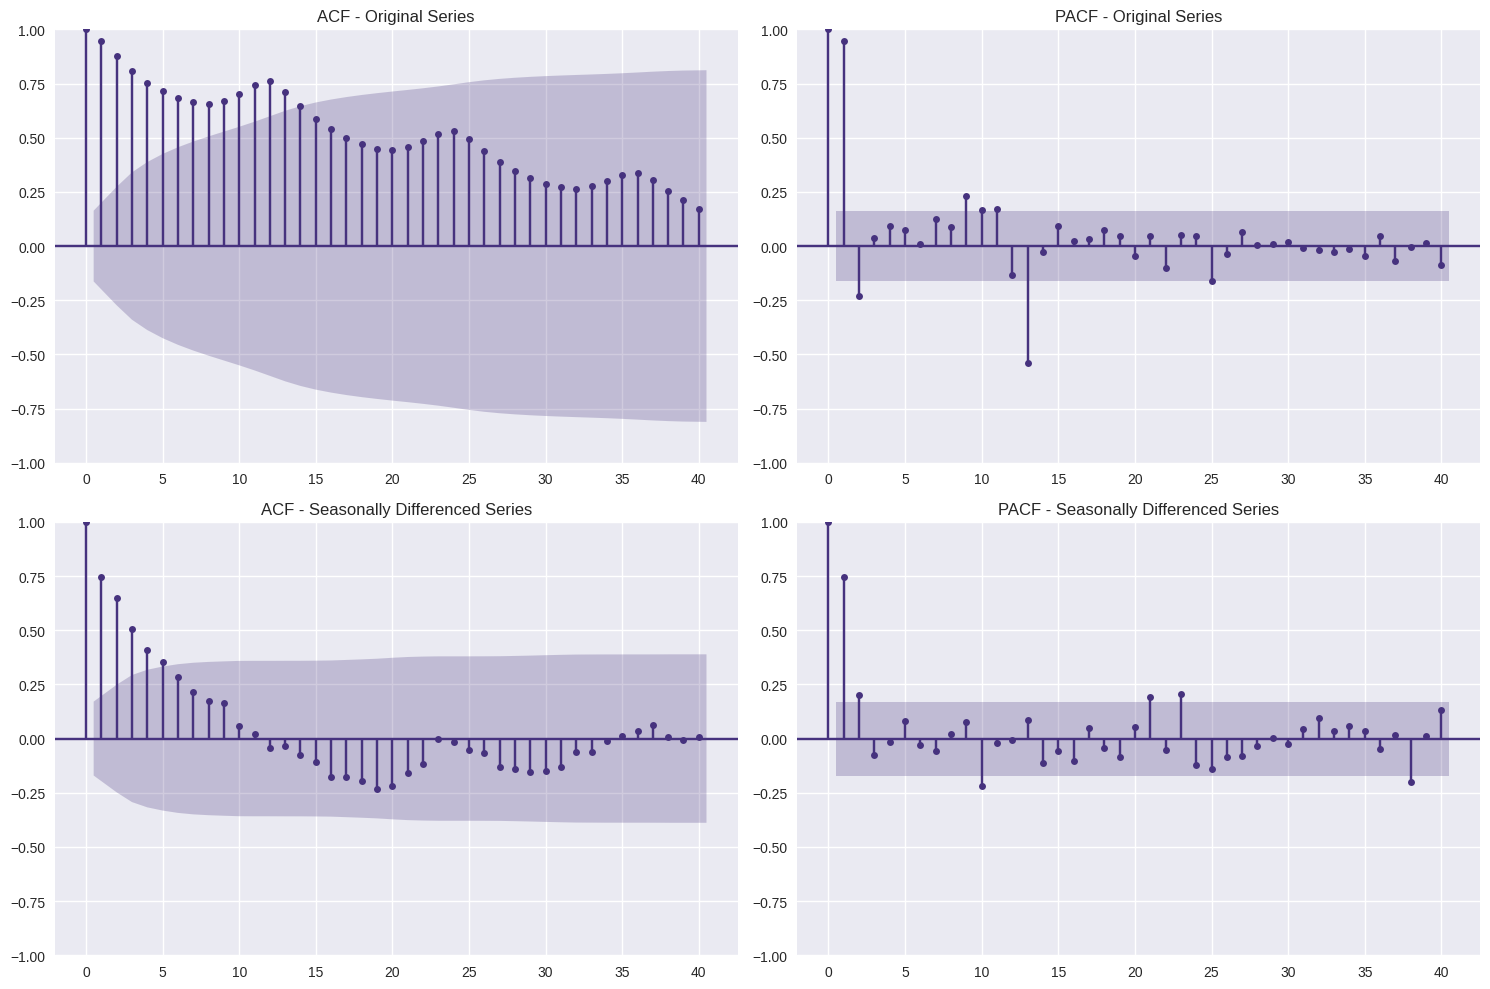

Train size: 115
Test size: 29
Test period: 1958-08-01 00:00:00 to 1960-12-01 00:00:00

=== SARIMA MODEL SUMMARY ===
                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  115
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -323.801
Date:                            Thu, 18 Sep 2025   AIC                            657.601
Time:                                    14:45:36   BIC                            669.988
Sample:                                         0   HQIC                           662.592
                                            - 115                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

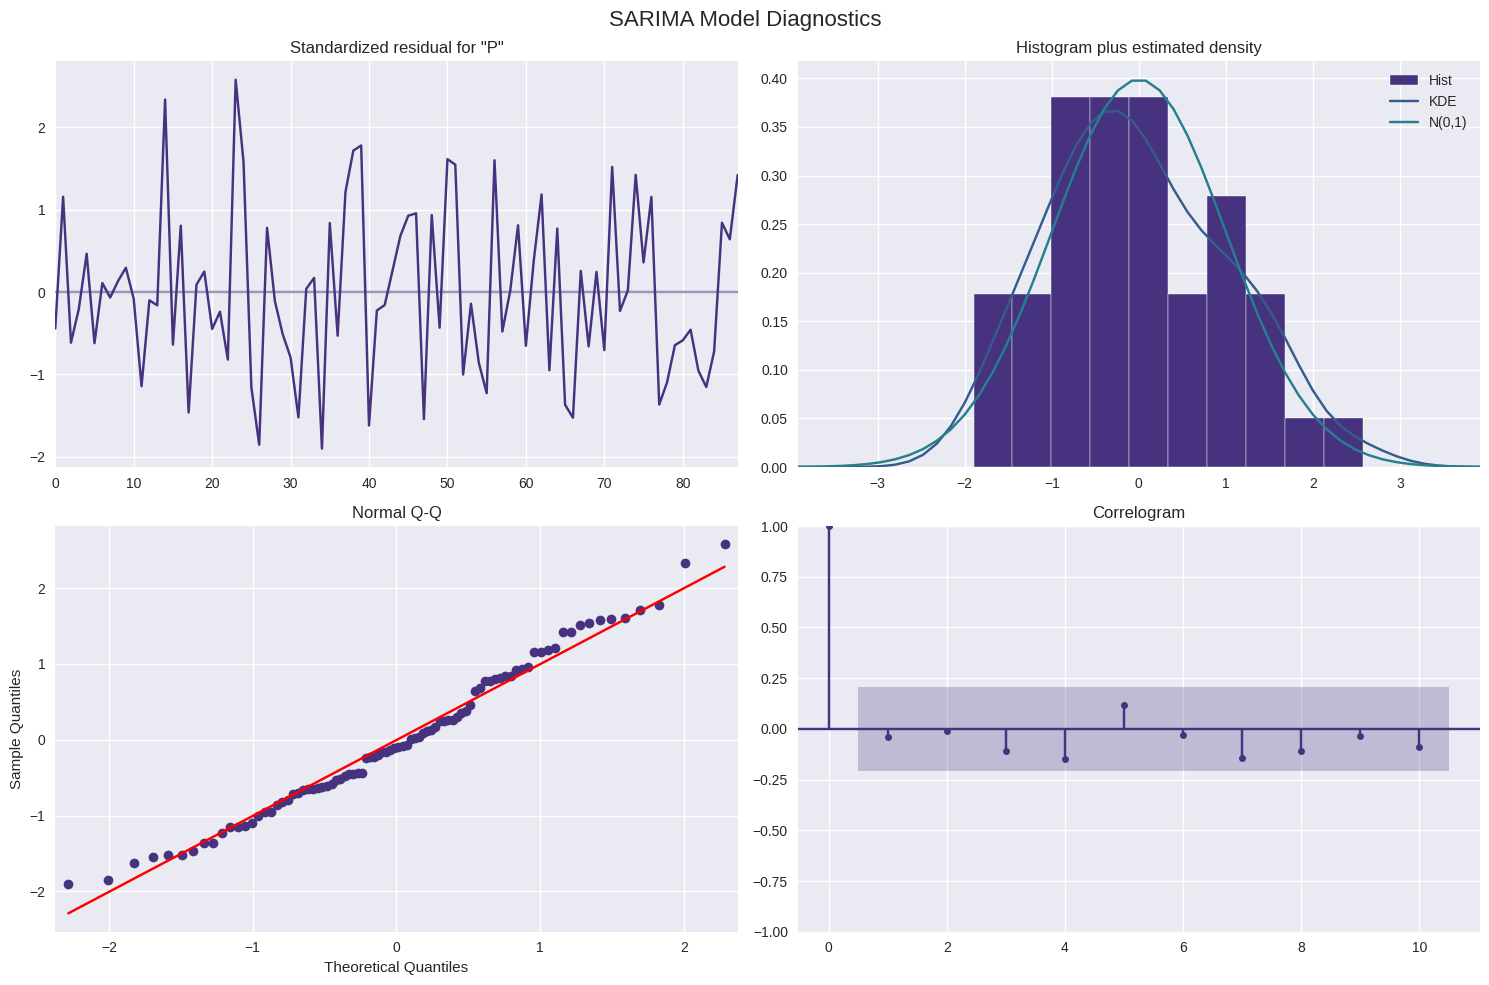


=== MODEL EVALUATION ===
MAE: 25.27
RMSE: 31.79
MAPE: 5.43%


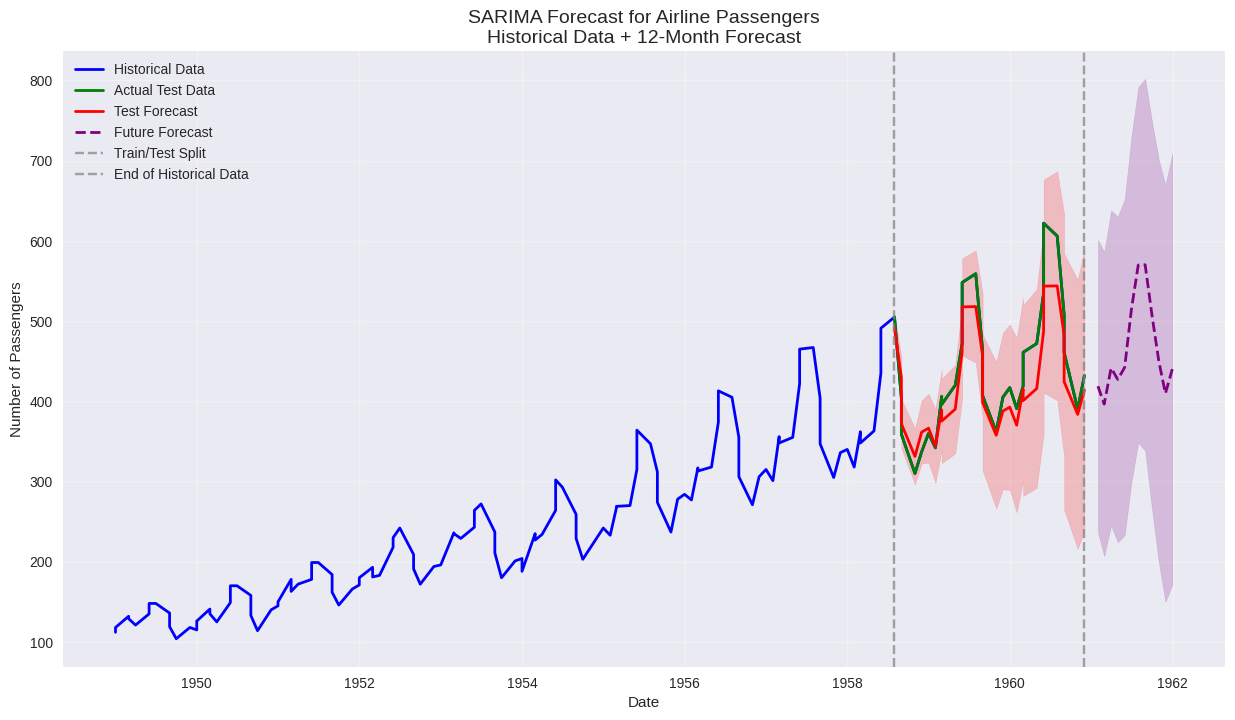


=== 12-MONTH FORECAST ===
          Date  Forecasted_Passengers  Lower_CI  Upper_CI
144 1961-01-31                  418.8     236.2     601.4
145 1961-02-28                  396.4     206.7     586.1
146 1961-03-31                  441.4     245.0     637.7
147 1961-04-30                  427.2     224.3     630.2
148 1961-05-31                  442.2     233.0     651.5
149 1961-06-30                  513.9     298.5     729.4
150 1961-07-31                  569.8     348.4     791.2
151 1961-08-31                  570.1     338.2     802.1
152 1961-09-30                  508.6     267.2     750.0
153 1961-10-31                  450.6     199.6     701.7
154 1961-11-30                  409.8     149.9     669.7
155 1961-12-31                  440.1     171.3     708.8

Forecast Insights:
Current passengers (Dec 1960): 432
Forecasted passengers (Dec 1961): 440
Expected annual growth: 1.9%

=== MODEL COMPARISON ===
SARIMA(1, 1, 1)(1, 1, 1, 12): MAE=25.27, RMSE=31.79
SARIMA(0, 1, 1)(0, 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

# Load the AirPassengers dataset
from statsmodels.datasets import get_rdataset
data = get_rdataset('AirPassengers')
df = data.data

# Convert the 'time' column (float representing year and fractional year) to datetime
# Extract year and fractional part, calculate month
df['year'] = df['time'].apply(np.floor).astype(int)
df['fractional_year'] = df['time'] - df['year']
# Approximate month by multiplying fractional year by 12 and rounding up
df['month'] = (df['fractional_year'] * 12).apply(np.ceil).astype(int)
# Ensure month is within 1-12 range
df['month'] = np.clip(df['month'], 1, 12)

# Create datetime column from year and month
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))

# Set date as index and keep only the 'value' column
df.set_index('date', inplace=True)
df = df[['value']]
df.columns = ['Passengers']


print("Dataset Overview:")
print(df.head())
print(f"\nDataset Shape: {df.shape}")
print(f"Date Range: {df.index.min()} to {df.index.max()}")

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], label='Original Series', color='blue', linewidth=2)
plt.title('Monthly Airline Passengers (1949-1960)')
plt.ylabel('Number of Passengers')
plt.xlabel('Date')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Decompose to understand seasonality and trend
decomposition = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)

plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle('Time Series Decomposition (Multiplicative)')
plt.tight_layout()
plt.show()

# Check stationarity using Augmented Dickey-Fuller test
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

    if result[1] <= 0.05:
        print("→ Series is stationary")
    else:
        print("→ Series is non-stationary")

print("Original Series Stationarity Check:")
check_stationarity(df['Passengers'])

# Apply differencing to make series stationary
df['passengers_diff'] = df['Passengers'].diff()
df['passengers_diff_seasonal'] = df['Passengers'].diff(12)

# Drop NaN values
df_clean = df.dropna()

print("\nAfter First Differencing:")
check_stationarity(df_clean['passengers_diff'])

print("\nAfter Seasonal Differencing (lag=12):")
check_stationarity(df_clean['passengers_diff_seasonal'])

# Plot ACF and PACF to determine SARIMA parameters
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# ACF of original series
plot_acf(df['Passengers'], ax=axes[0, 0], lags=40)
axes[0, 0].set_title('ACF - Original Series')

# PACF of original series
plot_pacf(df['Passengers'], ax=axes[0, 1], lags=40)
axes[0, 1].set_title('PACF - Original Series')

# ACF of differenced series
plot_acf(df_clean['passengers_diff_seasonal'], ax=axes[1, 0], lags=40)
axes[1, 0].set_title('ACF - Seasonally Differenced Series')

# PACF of differenced series
plot_pacf(df_clean['passengers_diff_seasonal'], ax=axes[1, 1], lags=40)
axes[1, 1].set_title('PACF - Seasonally Differenced Series')

plt.tight_layout()
plt.show()

# Split data into train and test
train_size = int(len(df) * 0.8)
train = df['Passengers'][:train_size]
test = df['Passengers'][train_size:]

print(f"Train size: {len(train)}")
print(f"Test size: {len(test)}")
print(f"Test period: {test.index.min()} to {test.index.max()}")

# Based on ACF/PACF analysis and domain knowledge, let's choose SARIMA parameters
# SARIMA(p,d,q)(P,D,Q,s) where s=12 for monthly data

# Let's try SARIMA(1,1,1)(1,1,1,12) - a good starting point
sarima_model = SARIMAX(
    train,
    order=(1, 1, 1),           # (p, d, q) - non-seasonal parameters
    seasonal_order=(1, 1, 1, 12),  # (P, D, Q, s) - seasonal parameters
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit the model
sarima_results = sarima_model.fit(disp=False)

print("\n=== SARIMA MODEL SUMMARY ===")
print(sarima_results.summary())

# Diagnostic plots
sarima_results.plot_diagnostics(figsize=(15, 10))
plt.suptitle('SARIMA Model Diagnostics', fontsize=16)
plt.tight_layout()
plt.show()

# Forecast on test data
forecast_steps = len(test)
forecast = sarima_results.get_forecast(steps=forecast_steps)

# Get forecast and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Ensure forecast values have the same index as the test data
forecast_values.index = test.index
confidence_intervals.index = test.index


# Calculate evaluation metrics
mae = mean_absolute_error(test, forecast_values)
rmse = np.sqrt(mean_squared_error(test, forecast_values))
mape = np.mean(np.abs((test - forecast_values) / test)) * 100

print(f"\n=== MODEL EVALUATION ===")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Forecast next 12 months
future_steps = 12
future_forecast = sarima_results.get_forecast(steps=forecast_steps + future_steps)
future_values = future_forecast.predicted_mean
future_ci = future_forecast.conf_int()

# Create future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_steps, freq='M')

# Combine test forecast and future forecast
all_forecast_dates = list(forecast_index) + list(future_dates)
all_forecast_values = list(forecast_values) + list(future_values.iloc[-future_steps:])

# Visualize the results
plt.figure(figsize=(15, 8))

# Plot historical data
plt.plot(df.index, df['Passengers'], label='Historical Data', color='blue', linewidth=2)

# Plot test data
plt.plot(test.index, test, label='Actual Test Data', color='green', linewidth=2)

# Plot forecast on test period
plt.plot(forecast_index, forecast_values, label='Test Forecast', color='red', linewidth=2)
plt.fill_between(forecast_index,
                confidence_intervals.iloc[:, 0],
                confidence_intervals.iloc[:, 1],
                color='red', alpha=0.2)

# Plot future forecast
plt.plot(future_dates, future_values.iloc[-future_steps:], label='Future Forecast', color='purple', linewidth=2, linestyle='--')
plt.fill_between(future_dates,
                future_ci.iloc[-future_steps:, 0],
                future_ci.iloc[-future_steps:, 1],
                color='purple', alpha=0.2)

plt.axvline(x=test.index[0], color='gray', linestyle='--', alpha=0.7, label='Train/Test Split')
plt.axvline(x=last_date, color='gray', linestyle='--', alpha=0.7, label='End of Historical Data')

plt.title('SARIMA Forecast for Airline Passengers\nHistorical Data + 12-Month Forecast', fontsize=14)
plt.ylabel('Number of Passengers')
plt.xlabel('Date')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Display forecast values for next 12 months
future_forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted_Passengers': future_values.iloc[-future_steps:],
    'Lower_CI': future_ci.iloc[-future_steps:, 0],
    'Upper_CI': future_ci.iloc[-future_steps:, 1]
})

print("\n=== 12-MONTH FORECAST ===")
print(future_forecast_df.round(1))

# Calculate forecast growth
current_passengers = df['Passengers'].iloc[-1]
forecast_growth = ((future_values.iloc[-1] - current_passengers) / current_passengers) * 100

print(f"\nForecast Insights:")
print(f"Current passengers (Dec 1960): {current_passengers:.0f}")
print(f"Forecasted passengers (Dec 1961): {future_values.iloc[-1]:.0f}")
print(f"Expected annual growth: {forecast_growth:.1f}%")

# Additional analysis: Compare different SARIMA models
def evaluate_sarima_model(train_data, test_data, order, seasonal_order):
    """Evaluate SARIMA model with given parameters"""
    try:
        model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order,
                       enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)

        # Forecast
        forecast = results.get_forecast(steps=len(test_data))
        forecast_values = forecast.predicted_mean
        # Ensure forecast values have the same index as the test data
        forecast_values.index = test_data.index


        # Calculate metrics
        mae = mean_absolute_error(test_data, forecast_values)
        rmse = np.sqrt(mean_squared_error(test_data, forecast_values))

        return results, mae, rmse, forecast_values

    except Exception as e:
        print(f"Error with {order}{seasonal_order}: {e}")
        return None, None, None, None

# Try different parameter combinations
models_to_try = [
    ((1, 1, 1), (1, 1, 1, 12)),
    ((0, 1, 1), (0, 1, 1, 12)),
    ((1, 1, 0), (1, 1, 0, 12)),
    ((2, 1, 2), (1, 1, 1, 12))
]

print("\n=== MODEL COMPARISON ===")
best_model = None
best_rmse = float('inf')

for order, seasonal_order in models_to_try:
    results, mae, rmse, forecast_vals = evaluate_sarima_model(train, test, order, seasonal_order)
    if results is not None:
        print(f"SARIMA{order}{seasonal_order}: MAE={mae:.2f}, RMSE={rmse:.2f}")
        if rmse < best_rmse:
            best_rmse = rmse
            best_model = (order, seasonal_order, results)

print(f"\nBest model: SARIMA{best_model[0]}{best_model[1]} with RMSE={best_rmse:.2f}")

Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.

Dataset Overview:
   feature1  feature2  feature3  feature4  cluster  true_anomaly
0 -5.481997 -7.120197 -5.553650  9.297417        2             0
1  3.627988  0.747208  2.451167  3.210099        1             1
2  7.153526  0.465588  5.165034  6.841382        1             0
3 -2.139791  7.832256  0.657742  8.117944        0             0
4  5.724016  1.239773  4.588210  5.788666        1             0

Dataset Shape: (500, 6)
Number of true anomalies: 30

Basic Statistics:
         feature1    feature2    feature3    feature4     cluster  \
count  500.000000  500.000000  500.000000  500.000000  500.000000   
mean    -1.479948    1.399829   -0.650932    8.184588    0.998000   
std      4.863218    6.510520    4.824296    2.471941    0.816903   
min     -9.455872   -9.808032  -19.340763    2.393709    0.000000   
25%     -6.039201   -5.920794   -6.146511    6.018569    0.000000   
50%     -2.471296    1.846173    0.879947    8.844957    1.000000   
75%      3.885812    8.267212    3.2

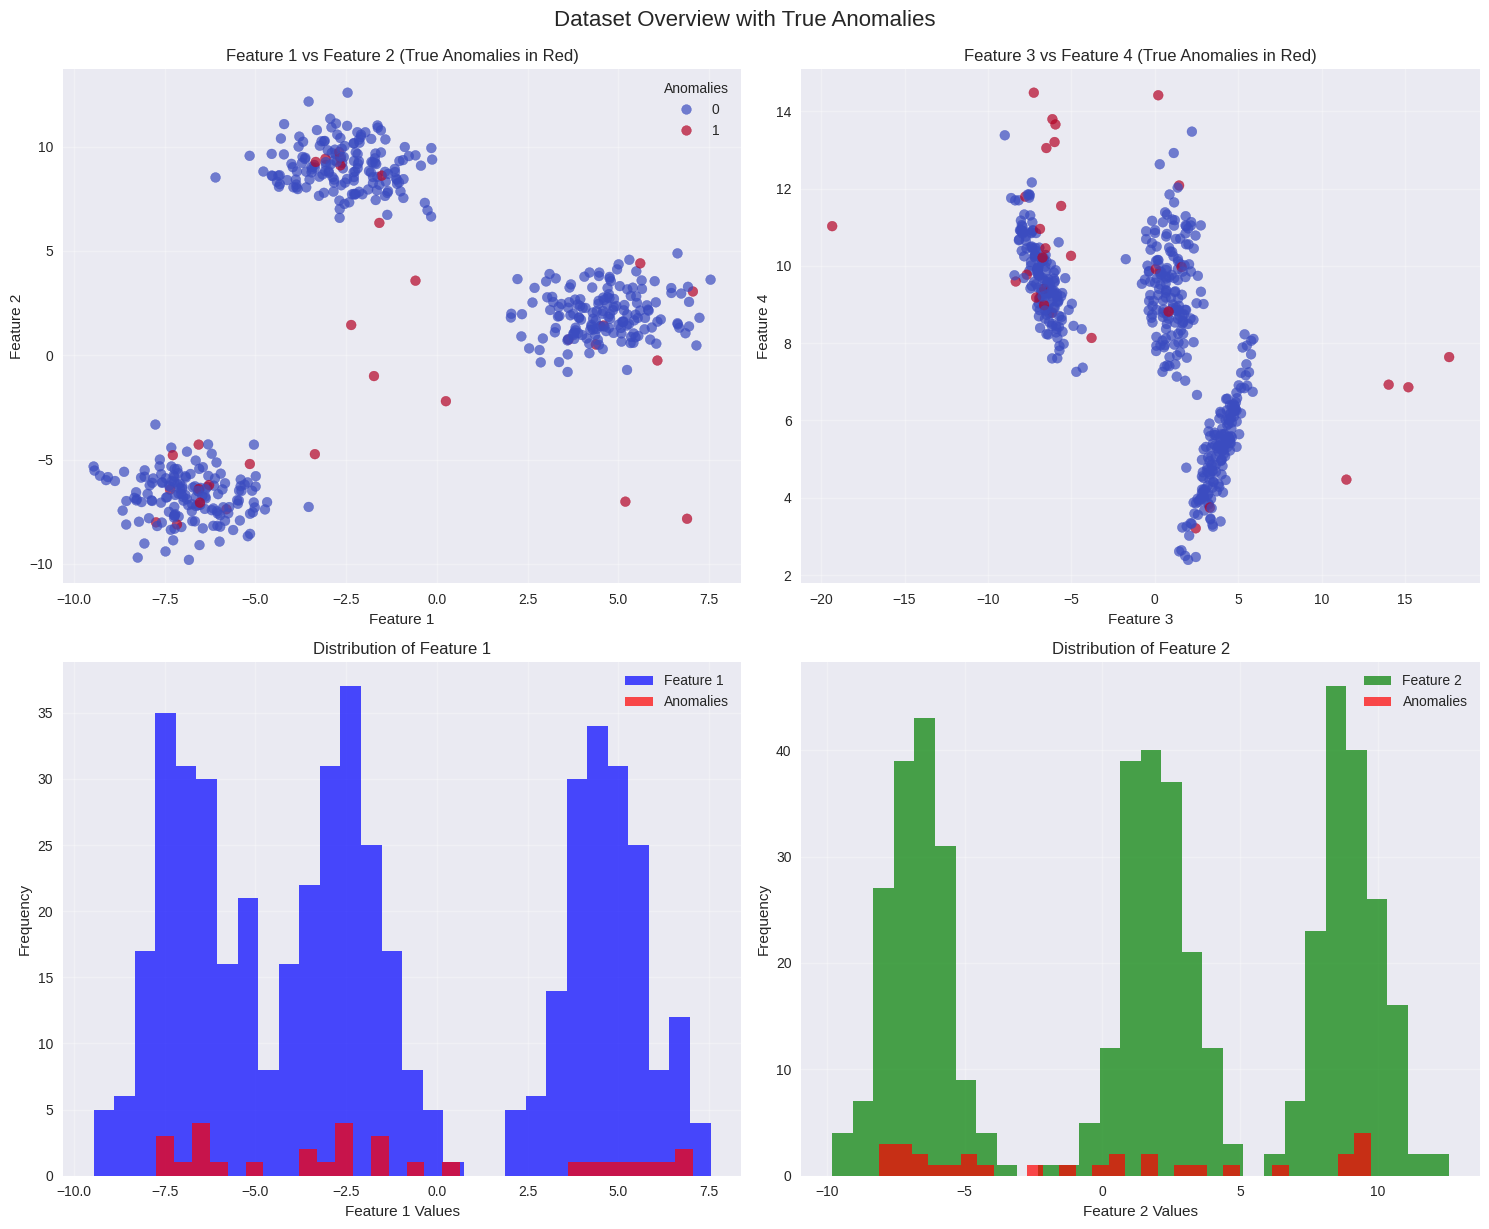


=== LOF ANOMALY DETECTION RESULTS ===
Number of anomalies detected: 25
Percentage detected as anomalies: 5.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       470
           1       0.92      0.77      0.84        30

    accuracy                           0.98       500
   macro avg       0.95      0.88      0.91       500
weighted avg       0.98      0.98      0.98       500

Confusion Matrix:
[[468   2]
 [  7  23]]


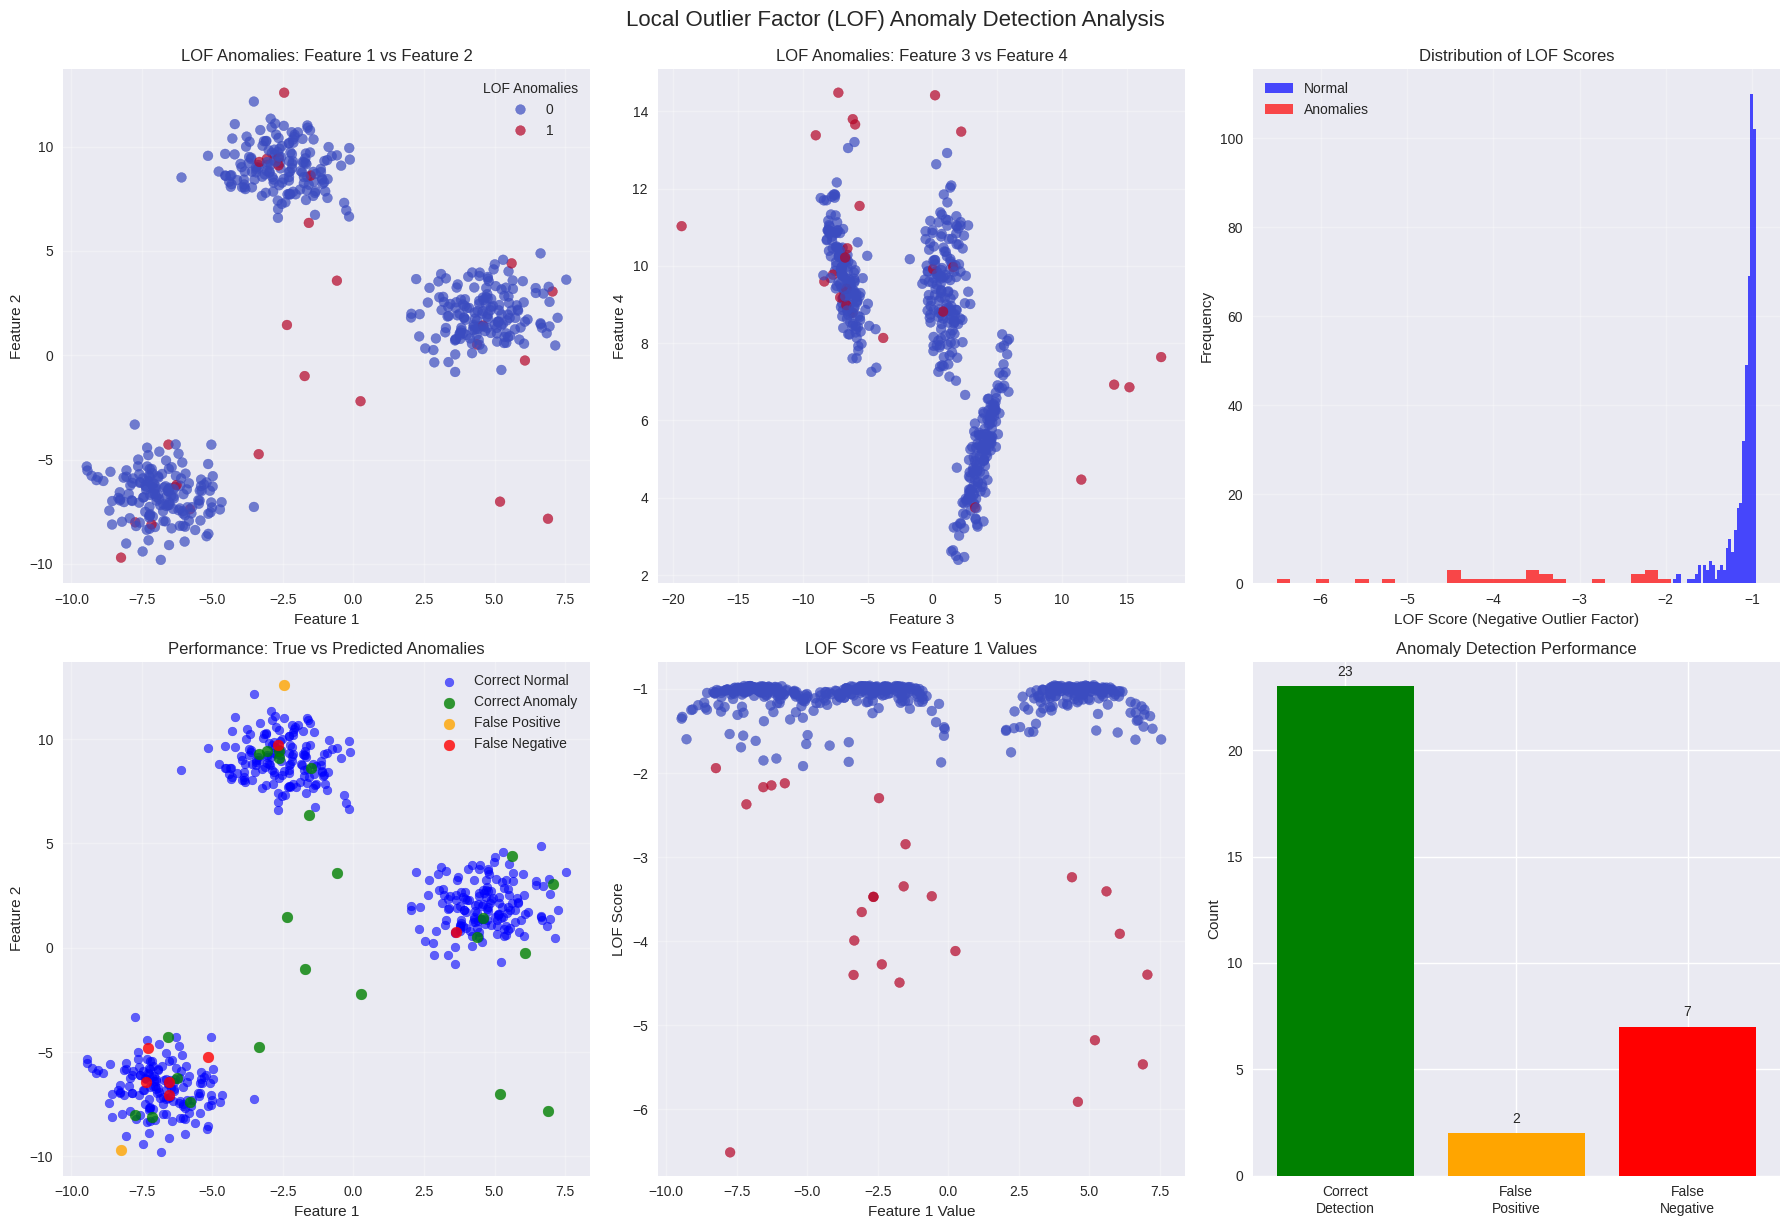

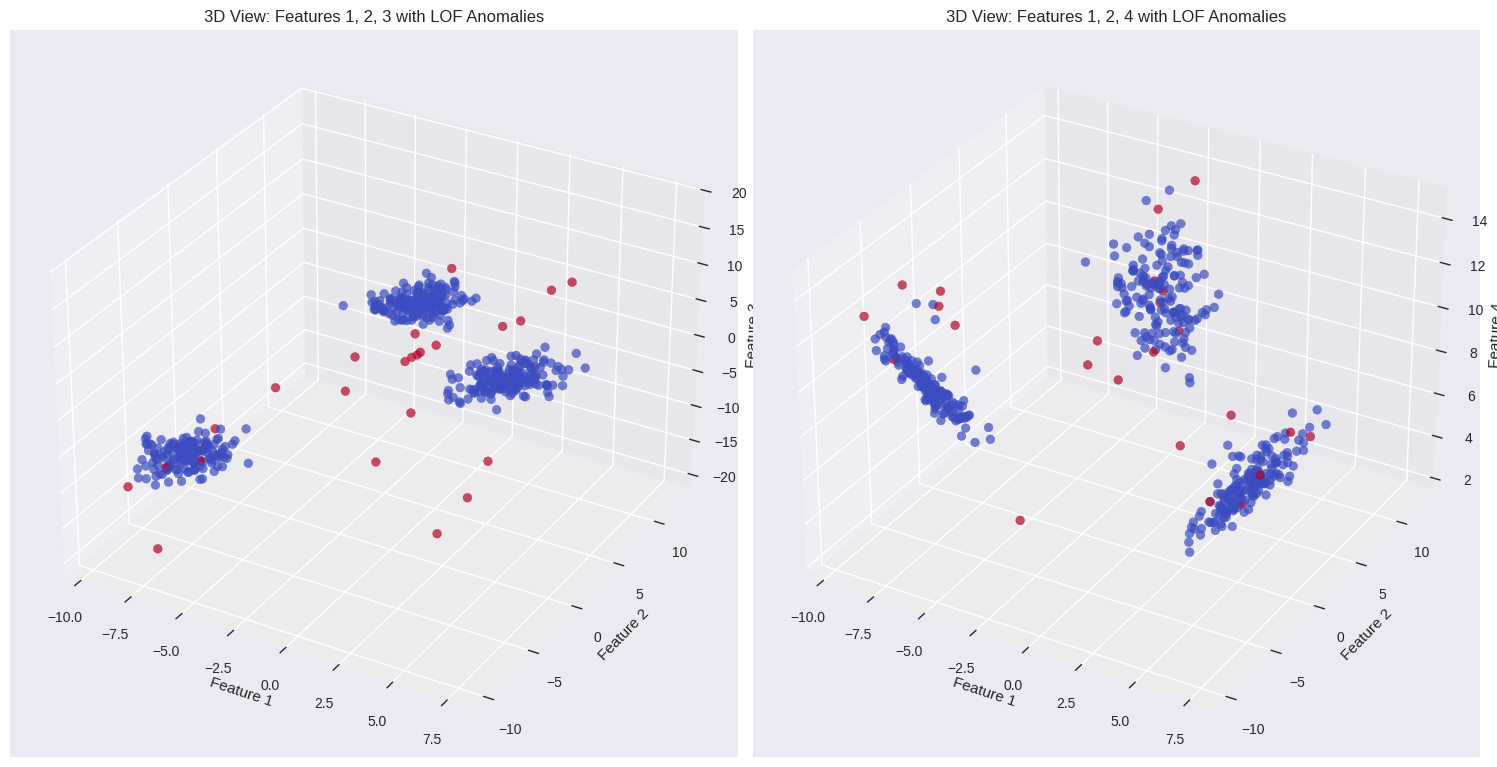


=== DETECTED ANOMALIES ANALYSIS ===
Top 10 most anomalous points (lowest LOF scores):
     feature1  feature2  feature3  feature4  lof_score
59     -7.736    -8.009   -19.341    11.027     -6.512
265     4.593     1.419    11.483     4.470     -5.911
473     6.896    -7.839     0.825     8.818     -5.465
329     5.197    -7.019    -6.558    10.454     -5.178
345    -1.731    -1.000     0.056     9.918     -4.493
415    -3.360    -4.743     3.297     3.747     -4.402
211     7.057     3.051    17.642     7.640     -4.399
416    -2.358     1.447     1.606     9.968     -4.275
492     0.251    -2.205    -6.732    10.215     -4.117
417    -3.335     9.261    -8.338     9.595     -3.992

Comparison between normal and anomalous points:
Normal points - Mean LOF score: -1.089
Anomalous points - Mean LOF score: -3.704

Feature means comparison:
feature1: Normal=-1.50, Anomaly=-1.08 (-28.0%)
feature2: Normal=1.45, Anomaly=0.49 (-65.8%)
feature3: Normal=-0.59, Anomaly=-1.86 (+215.9%)
feature4: N

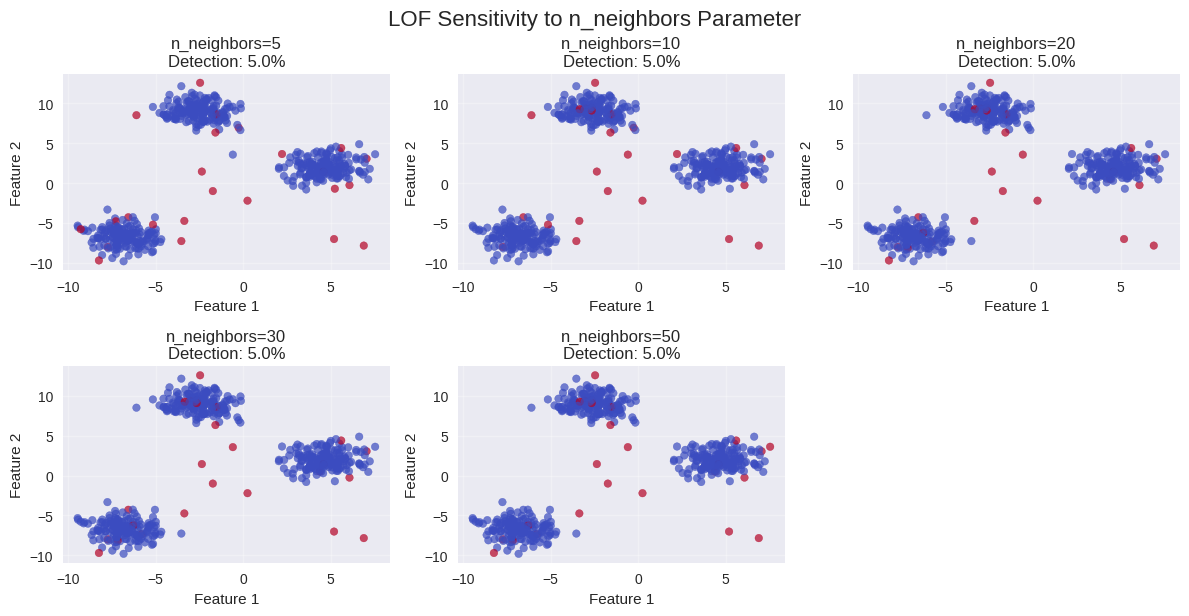


=== LOF PARAMETER SENSITIVITY ===
n_neighbors=5: Detection rate = 5.0%
n_neighbors=10: Detection rate = 5.0%
n_neighbors=20: Detection rate = 5.0%
n_neighbors=30: Detection rate = 5.0%
n_neighbors=50: Detection rate = 5.0%


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

# Create a synthetic dataset with clusters and anomalies
np.random.seed(42)

# Generate main clusters
n_samples = 500
X, y = make_blobs(n_samples=n_samples, centers=3, cluster_std=1.0, random_state=42)

# Add some feature columns to make it more interesting
feature1 = X[:, 0] + np.random.normal(0, 0.5, n_samples)
feature2 = X[:, 1] + np.random.normal(0, 0.5, n_samples)
feature3 = feature1 * 0.7 + feature2 * 0.3 + np.random.normal(0, 0.3, n_samples)
feature4 = np.sqrt(feature1**2 + feature2**2) + np.random.normal(0, 0.4, n_samples)

# Create some manual anomalies
n_anomalies = 30
anomaly_indices = np.random.choice(n_samples, n_anomalies, replace=False)

# Create different types of anomalies
# Type 1: Extreme values in feature space
feature1[anomaly_indices[:10]] = np.random.uniform(-8, 8, 10)
feature2[anomaly_indices[:10]] = np.random.uniform(-8, 8, 10)

# Type 2: Unusual combinations
feature3[anomaly_indices[10:20]] = feature1[anomaly_indices[10:20]] * 2.5  # Unusual relationship
feature4[anomaly_indices[20:30]] = np.random.uniform(10, 15, 10)  # Extreme values

# Create DataFrame
df = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'feature3': feature3,
    'feature4': feature4,
    'cluster': y
})

# Mark true anomalies (for evaluation)
df['true_anomaly'] = 0
df.loc[anomaly_indices, 'true_anomaly'] = 1

print("Dataset Overview:")
print(df.head())
print(f"\nDataset Shape: {df.shape}")
print(f"Number of true anomalies: {df['true_anomaly'].sum()}")

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Visualize the dataset first
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Scatter plots of different feature combinations
scatter1 = axes[0, 0].scatter(df['feature1'], df['feature2'], c=df['true_anomaly'],
                             cmap='coolwarm', alpha=0.7, s=50)
axes[0, 0].set_xlabel('Feature 1')
axes[0, 0].set_ylabel('Feature 2')
axes[0, 0].set_title('Feature 1 vs Feature 2 (True Anomalies in Red)')
axes[0, 0].grid(True, alpha=0.3)
legend1 = axes[0, 0].legend(*scatter1.legend_elements(), title="Anomalies")

scatter2 = axes[0, 1].scatter(df['feature3'], df['feature4'], c=df['true_anomaly'],
                             cmap='coolwarm', alpha=0.7, s=50)
axes[0, 1].set_xlabel('Feature 3')
axes[0, 1].set_ylabel('Feature 4')
axes[0, 1].set_title('Feature 3 vs Feature 4 (True Anomalies in Red)')
axes[0, 1].grid(True, alpha=0.3)

# Distribution plots
axes[1, 0].hist(df['feature1'], bins=30, alpha=0.7, color='blue', label='Feature 1')
axes[1, 0].hist(df[df['true_anomaly'] == 1]['feature1'], bins=30, alpha=0.7, color='red', label='Anomalies')
axes[1, 0].set_xlabel('Feature 1 Values')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Feature 1')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(df['feature2'], bins=30, alpha=0.7, color='green', label='Feature 2')
axes[1, 1].hist(df[df['true_anomaly'] == 1]['feature2'], bins=30, alpha=0.7, color='red', label='Anomalies')
axes[1, 1].set_xlabel('Feature 2 Values')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Feature 2')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Dataset Overview with True Anomalies', fontsize=16, y=1.02)
plt.show()

# Prepare data for LOF
features = ['feature1', 'feature2', 'feature3', 'feature4']
X = df[features].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Local Outlier Factor (LOF)
lof = LocalOutlierFactor(
    n_neighbors=20,        # Number of neighbors to consider
    contamination=0.05,    # Expected proportion of outliers
    novelty=False,         # We're using fit_predict
    metric='euclidean'     # Distance metric
)

# Fit the model and get anomaly scores and predictions
lof.fit(X_scaled)
df['lof_score'] = lof.negative_outlier_factor_
df['lof_anomaly'] = lof.fit_predict(X_scaled) # Or use lof.labels_ after fit

# Convert predictions (-1, 1) to (1, 0) for consistency
df['lof_anomaly'] = df['lof_anomaly'].apply(lambda x: 1 if x == -1 else 0)


print("\n=== LOF ANOMALY DETECTION RESULTS ===")
print(f"Number of anomalies detected: {df['lof_anomaly'].sum()}")
print(f"Percentage detected as anomalies: {(df['lof_anomaly'].sum() / len(df)) * 100:.2f}%")

# Evaluate performance (since we know true anomalies)
if 'true_anomaly' in df.columns:
    print("\nClassification Report:")
    print(classification_report(df['true_anomaly'], df['lof_anomaly']))

    # Confusion matrix
    cm = confusion_matrix(df['true_anomaly'], df['lof_anomaly'])
    print("Confusion Matrix:")
    print(cm)

# Visualize LOF results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Feature 1 vs Feature 2 with LOF anomalies
scatter1 = axes[0, 0].scatter(df['feature1'], df['feature2'], c=df['lof_anomaly'],
                             cmap='coolwarm', alpha=0.7, s=50)
axes[0, 0].set_xlabel('Feature 1')
axes[0, 0].set_ylabel('Feature 2')
axes[0, 0].set_title('LOF Anomalies: Feature 1 vs Feature 2')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend(*scatter1.legend_elements(), title="LOF Anomalies")

# Plot 2: Feature 3 vs Feature 4 with LOF anomalies
scatter2 = axes[0, 1].scatter(df['feature3'], df['feature4'], c=df['lof_anomaly'],
                             cmap='coolwarm', alpha=0.7, s=50)
axes[0, 1].set_xlabel('Feature 3')
axes[0, 1].set_ylabel('Feature 4')
axes[0, 1].set_title('LOF Anomalies: Feature 3 vs Feature 4')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Distribution of LOF scores
normal_scores = df[df['lof_anomaly'] == 0]['lof_score']
anomaly_scores = df[df['lof_anomaly'] == 1]['lof_score']

axes[0, 2].hist(normal_scores, bins=30, alpha=0.7, label='Normal', color='blue')
axes[0, 2].hist(anomaly_scores, bins=30, alpha=0.7, label='Anomalies', color='red')
axes[0, 2].set_xlabel('LOF Score (Negative Outlier Factor)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Distribution of LOF Scores')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# Plot 4: Compare true vs predicted anomalies (if available)
if 'true_anomaly' in df.columns:
    correct_normal = df[(df['true_anomaly'] == 0) & (df['lof_anomaly'] == 0)]
    correct_anomaly = df[(df['true_anomaly'] == 1) & (df['lof_anomaly'] == 1)]
    false_positive = df[(df['true_anomaly'] == 0) & (df['lof_anomaly'] == 1)]
    false_negative = df[(df['true_anomaly'] == 1) & (df['lof_anomaly'] == 0)]

    axes[1, 0].scatter(correct_normal['feature1'], correct_normal['feature2'],
                      color='blue', alpha=0.6, s=40, label='Correct Normal')
    axes[1, 0].scatter(correct_anomaly['feature1'], correct_anomaly['feature2'],
                      color='green', alpha=0.8, s=60, label='Correct Anomaly')
    axes[1, 0].scatter(false_positive['feature1'], false_positive['feature2'],
                      color='orange', alpha=0.8, s=60, label='False Positive')
    axes[1, 0].scatter(false_negative['feature1'], false_negative['feature2'],
                      color='red', alpha=0.8, s=60, label='False Negative')

    axes[1, 0].set_xlabel('Feature 1')
    axes[1, 0].set_ylabel('Feature 2')
    axes[1, 0].set_title('Performance: True vs Predicted Anomalies')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

# Plot 5: LOF score vs feature values
scatter5 = axes[1, 1].scatter(df['feature1'], df['lof_score'], c=df['lof_anomaly'],
                             cmap='coolwarm', alpha=0.7, s=50)
axes[1, 1].set_xlabel('Feature 1 Value')
axes[1, 1].set_ylabel('LOF Score')
axes[1, 1].set_title('LOF Score vs Feature 1 Values')
axes[1, 1].grid(True, alpha=0.3)

# Plot 6: Anomaly type analysis
if 'true_anomaly' in df.columns:
    anomaly_types = ['Correct\nDetection', 'False\nPositive', 'False\nNegative']
    counts = [
        len(correct_anomaly),
        len(false_positive),
        len(false_negative)
    ]

    axes[1, 2].bar(anomaly_types, counts, color=['green', 'orange', 'red'])
    axes[1, 2].set_ylabel('Count')
    axes[1, 2].set_title('Anomaly Detection Performance')
    for i, v in enumerate(counts):
        axes[1, 2].text(i, v + 0.5, str(v), ha='center')

plt.tight_layout()
plt.suptitle('Local Outlier Factor (LOF) Anomaly Detection Analysis', fontsize=16, y=1.02)
plt.show()

# 3D Visualization
fig = plt.figure(figsize=(15, 10))

# 3D plot 1: Features 1, 2, 3
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(df['feature1'], df['feature2'], df['feature3'],
                      c=df['lof_anomaly'], cmap='coolwarm', alpha=0.7, s=40)
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')
ax1.set_title('3D View: Features 1, 2, 3 with LOF Anomalies')

# 3D plot 2: Features 1, 2, 4
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(df['feature1'], df['feature2'], df['feature4'],
                      c=df['lof_anomaly'], cmap='coolwarm', alpha=0.7, s=40)
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_zlabel('Feature 4')
ax2.set_title('3D View: Features 1, 2, 4 with LOF Anomalies')

plt.tight_layout()
plt.show()

# Analyze the detected anomalies
print("\n=== DETECTED ANOMALIES ANALYSIS ===")
anomalies_df = df[df['lof_anomaly'] == 1]
normal_df = df[df['lof_anomaly'] == 0]

print("Top 10 most anomalous points (lowest LOF scores):")
print(anomalies_df.nsmallest(10, 'lof_score')[features + ['lof_score']].round(3))

print(f"\nComparison between normal and anomalous points:")
print(f"Normal points - Mean LOF score: {normal_df['lof_score'].mean():.3f}")
print(f"Anomalous points - Mean LOF score: {anomalies_df['lof_score'].mean():.3f}")

print(f"\nFeature means comparison:")
for feature in features:
    normal_mean = normal_df[feature].mean()
    anomaly_mean = anomalies_df[feature].mean()
    diff_pct = ((anomaly_mean - normal_mean) / normal_mean) * 100
    print(f"{feature}: Normal={normal_mean:.2f}, Anomaly={anomaly_mean:.2f} ({diff_pct:+.1f}%)")

# Additional analysis: Effect of different n_neighbors values
n_neighbors_values = [5, 10, 20, 30, 50]
detection_rates = []

plt.figure(figsize=(12, 6))
for i, n_neighbors in enumerate(n_neighbors_values):
    lof_var = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=0.05)
    # Fit and get predictions
    anomalies = lof_var.fit_predict(X_scaled)
    detection_rate = (anomalies == -1).sum() / len(anomalies)
    detection_rates.append(detection_rate)

    plt.subplot(2, 3, i+1)
    plt.scatter(df['feature1'], df['feature2'], c=(anomalies == -1), cmap='coolwarm', alpha=0.7, s=30)
    plt.title(f'n_neighbors={n_neighbors}\nDetection: {detection_rate*100:.1f}%')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('LOF Sensitivity to n_neighbors Parameter', fontsize=16, y=1.02)
plt.show()

print("\n=== LOF PARAMETER SENSITIVITY ===")
for n_neighbors, rate in zip(n_neighbors_values, detection_rates):
    print(f"n_neighbors={n_neighbors}: Detection rate = {rate*100:.1f}%")

Question 10: You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?


Answer:

Real-Time Data Science Workflow
1. Anomaly Detection

Use Isolation Forest because:

Works well for high-dimensional, large, streaming datasets.

Can detect sudden spikes/drops in energy usage efficiently.

Alternative: LOF (for local density anomalies, e.g., one region behaving differently) or DBSCAN (if clustering regions/patterns).

2. Short-Term Forecasting

Use SARIMAX because:

Captures trend + seasonality.

Allows inclusion of exogenous variables like temperature and weather.

Example: Predicting demand on a hot day with AC load spikes.

3. Validation & Monitoring

Validation:

Backtesting with rolling forecast origin (train on past, predict next 15-min, compare with actual).

Metrics: MAE, RMSE, MAPE.

Monitoring:

Set up live dashboards (Power BI / Grafana).

Retrain periodically as data distribution changes.

Trigger alerts for anomalies beyond threshold.

4. Business Impact

Grid Stability: Early detection of abnormal load prevents blackouts.

Cost Optimization: Accurate demand forecasts reduce over/under-purchasing of power.

Operational Efficiency: Real-time alerts help operators respond to spikes (e.g., switch backup power sources).

Customer Satisfaction: Stable power supply and reduced outages